In [1]:
import math
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram
from fractions import Fraction

**Shor's Algorithm**

*A visualisation with place holders*

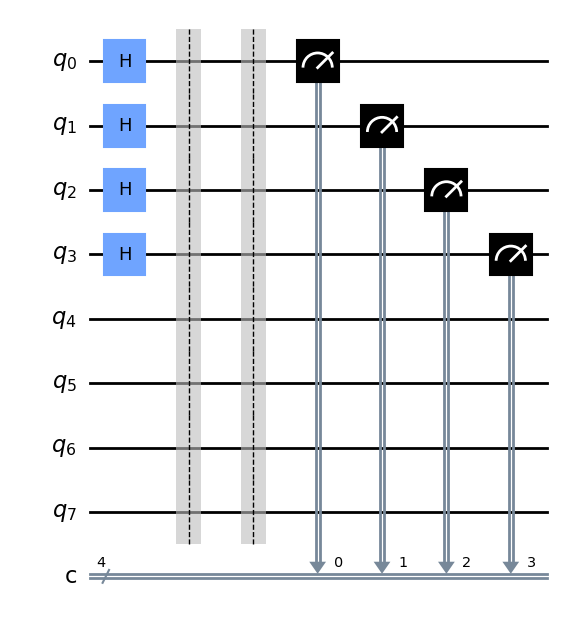

In [2]:
# Parameters for Shor's algorithm
N = 15  # Number we want to factor
n_count = 4  # Number of counting qubits (you can start with a small number for visualization)

# Step 1: Create a Quantum Circuit with `n_count` counting qubits + `n_count` additional qubits for the target register
qc = QuantumCircuit(n_count + 4, n_count)  # 4 additional qubits for now

# Step 2: Apply Hadamard gates to the counting qubits
for qubit in range(n_count):
    qc.h(qubit)

# Step 3: Placeholder for modular exponentiation (e.g., a^x mod N)
# For now, we won’t implement it but will visualize this step
qc.barrier()

# Step 4: Apply the Inverse Quantum Fourier Transform (QFT)
# For now, just a placeholder for QFT
qc.barrier()

# Step 5: Measure the counting qubits
for qubit in range(n_count):
    qc.measure(qubit, qubit)

# Draw the circuit
qc.draw('mpl')

*Modular Exponentiation*

In [26]:
# Given values
a = 7  # Chosen integer a
N = 15  # Number to factor
n_count = 4  # Number of counting qubits (meaning k ranges from 0 to 3)

# Step 1: Calculate a^(2^k) mod N for each k from 0 to n_count - 1
mod_exp_results = []
for k in range(n_count):
    result = pow(a, 2**k, N)  # Compute a^(2^k) mod N using Python's built-in pow function
    mod_exp_results.append(result)
    print(f"a^(2^{k}) mod N = {result}")

# Step 2: Convert each result to binary
# Determine how many bits we need to represent N
num_bits = N.bit_length()

binary_results = []
for result in mod_exp_results:
    binary_representation = bin(result)[2:].zfill(num_bits)  # Convert to binary, remove '0b' prefix, and pad with zeros
    binary_results.append(binary_representation)
    print(f"Binary representation of {result}: {binary_representation}")

# Output
print("\nSummary of Results:")
for k in range(n_count):
    print(f"Step {k}: a^(2^{k}) mod N = {mod_exp_results[k]} (binary: {binary_results[k]})")

a^(2^0) mod N = 7
a^(2^1) mod N = 4
a^(2^2) mod N = 1
a^(2^3) mod N = 1
Binary representation of 7: 0111
Binary representation of 4: 0100
Binary representation of 1: 0001
Binary representation of 1: 0001

Summary of Results:
Step 0: a^(2^0) mod N = 7 (binary: 0111)
Step 1: a^(2^1) mod N = 4 (binary: 0100)
Step 2: a^(2^2) mod N = 1 (binary: 0001)
Step 3: a^(2^3) mod N = 1 (binary: 0001)


In [5]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit.library import MCMT
import numpy as np

# Given values
a = 7  # Chosen integer a
N = 15  # Number to factor
n_count = 4  # Number of counting qubits (meaning k ranges from 0 to 3)

# Number of bits needed to represent N
num_bits = N.bit_length()

# Create a quantum circuit with n_count counting qubits and num_bits evaluation qubits
qc = QuantumCircuit(n_count + num_bits, n_count)

# Define the qubit ranges for the counting and evaluation qubits
counting_qubits = list(range(n_count))
evaluation_qubits = list(range(n_count, n_count + num_bits))

# Apply Hadamard gates to the counting qubits to create superposition (for Shor's, not necessarily needed here)
qc.h(counting_qubits)

# Function to implement controlled modular exponentiation using the precomputed values
def controlled_modular_exponentiation(circuit, a, N, n_count, num_bits):
    # Calculate a^(2^k) mod N for each k from 0 to n_count - 1
    for k in range(n_count):
        exp_result = pow(a, 2**k, N)
        
        # Apply a controlled multiplication of `exp_result` mod N on evaluation register
        for i in range(num_bits):
            if (exp_result >> i) & 1:
                # Apply CNOT from control qubit (kth counting qubit) to the ith evaluation qubit
                circuit.cx(counting_qubits[k], evaluation_qubits[i])

# Implement the controlled modular exponentiation on the circuit
controlled_modular_exponentiation(qc, a, N, n_count, num_bits)

# Draw the resulting circuit for modular exponentiation
qc.draw('text')

┌───┐                              
q_0: ┤ H ├──■────■─────────■────────────
     ├───┤  │    │         │            
q_1: ┤ H ├──┼────┼─────────┼─────────■──
     ├───┤  │    │         │         │  
q_2: ┤ H ├──┼────┼────■────┼─────────┼──
     ├───┤  │    │    │    │         │  
q_3: ┤ H ├──┼────┼────┼────┼────■────┼──
     └───┘┌─┴─┐  │  ┌─┴─┐  │  ┌─┴─┐  │  
q_4: ─────┤ X ├──┼──┤ X ├──┼──┤ X ├──┼──
          └───┘┌─┴─┐└───┘  │  └───┘  │  
q_5: ──────────┤ X ├───────┼─────────┼──
               └───┘     ┌─┴─┐     ┌─┴─┐
q_6: ────────────────────┤ X ├─────┤ X ├
                         └───┘     └───┘
q_7: ───────────────────────────────────
                                        
c: 4/═══════════════════════════════════

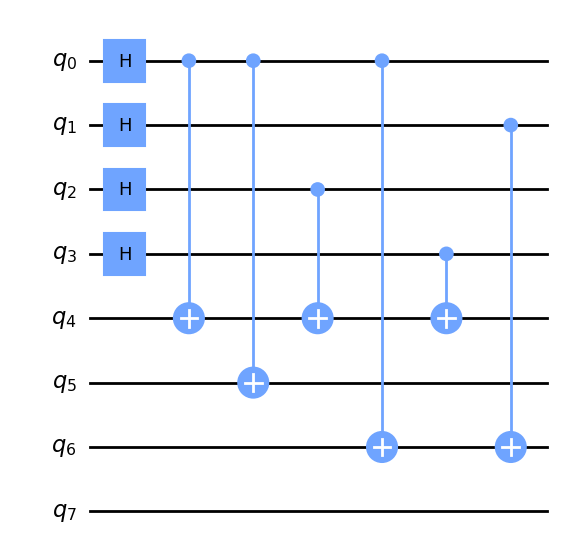

In [27]:
from qiskit import QuantumCircuit

# Given parameters from previous steps
n_count = 4  # Number of counting qubits
num_bits = N.bit_length()  # Number of target qubits needed

# Create a quantum circuit with n_count counting qubits and num_bits target qubits
qc = QuantumCircuit(n_count + num_bits)

# Apply the Hadamard gates to the counting qubits (this step is required before modular exponentiation)
for qubit in range(n_count):
    qc.h(qubit)

# Construct the modular exponentiation circuit
for k in range(n_count):
    # Extract the binary representation of a^(2^k) mod N from the previous calculation
    binary_representation = binary_results[k]
    
    # Iterate through the bits of the binary representation to place CNOT gates
    for idx, bit in enumerate(reversed(binary_representation)):
        if bit == '1':
            # Apply a CNOT gate controlled by counting qubit q_k targeting target qubit q_(n_count + idx)
            qc.cx(k, n_count + idx)

# Draw the quantum circuit to visualize the modular exponentiation part
qc.draw('mpl')

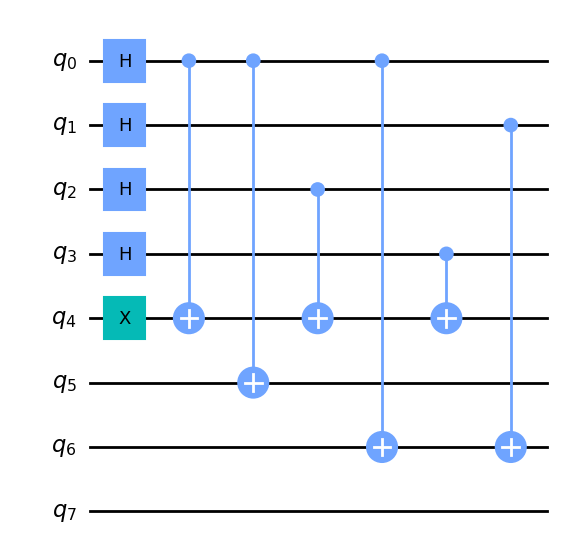

In [28]:
from qiskit import QuantumCircuit

# Given parameters
n_count = 4  # Number of counting qubits
num_bits = N.bit_length()  # Number of target qubits needed
qc = QuantumCircuit(n_count + num_bits)  # Create a quantum circuit with counting + target qubits

# Apply Hadamard gates to the counting qubits to create superposition
for qubit in range(n_count):
    qc.h(qubit)

# Initialize the first qubit of the target register to |1>
qc.x(n_count)  # Set the least significant target qubit to |1>

# Construct the modular exponentiation circuit as discussed earlier
# Using the example values from before

for k in range(n_count):
    # Extract the binary representation of a^(2^k) mod N from the previous calculation
    binary_representation = binary_results[k]
    
    # Iterate through the bits of the binary representation to place CNOT gates
    for idx, bit in enumerate(reversed(binary_representation)):
        if bit == '1':
            # Apply a CNOT gate controlled by counting qubit q_k targeting target qubit q_(n_count + idx)
            qc.cx(k, n_count + idx)

# Draw the quantum circuit to visualize the modular exponentiation part
qc.draw('mpl')

In [31]:
# Given parameters
n_count = 4  # Number of counting qubits
num_bits = N.bit_length()  # Number of target qubits

# Create a quantum circuit
qc = QuantumCircuit(n_count + num_bits)

# Step 1: Initialize the target register's first qubit to |1>
qc.x(n_count)  # Set the first target qubit (least significant qubit) to |1>

# Step 2: Set the counting qubits to represent x = 2 (binary '0010')
qc.x(1)  # Set qubit q1 to |1>

# Step 3: Apply the modular exponentiation circuit
# Iterate over all counting qubits
for k in range(n_count):
    # Retrieve the binary representation for a^(2^k) mod N
    binary_representation = binary_results[k]
    
    # Place CNOT gates based on '1's in the binary representation
    for idx, bit in enumerate(reversed(binary_representation)):
        if bit == '1':
            qc.cx(k, n_count + idx)

# Execute the circuit using the statevector simulator to examine the output
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

# Retrieve and analyze the statevector
statevector = result.get_statevector()
print("Final statevector:\n", statevector)

# Analyze only the target register part
target_state = statevector.reshape([2] * (n_count + num_bits))
target_state = target_state.sum(axis=tuple(range(n_count)))  # Trace out the counting qubits
print("\nState of the target register:\n", target_state)


Final statevector:
 Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0

C:\Users\avlbe\AppData\Local\Temp\ipykernel_4392\378056892.py:35: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  target_state = statevector.reshape([2] * (n_count + num_bits))


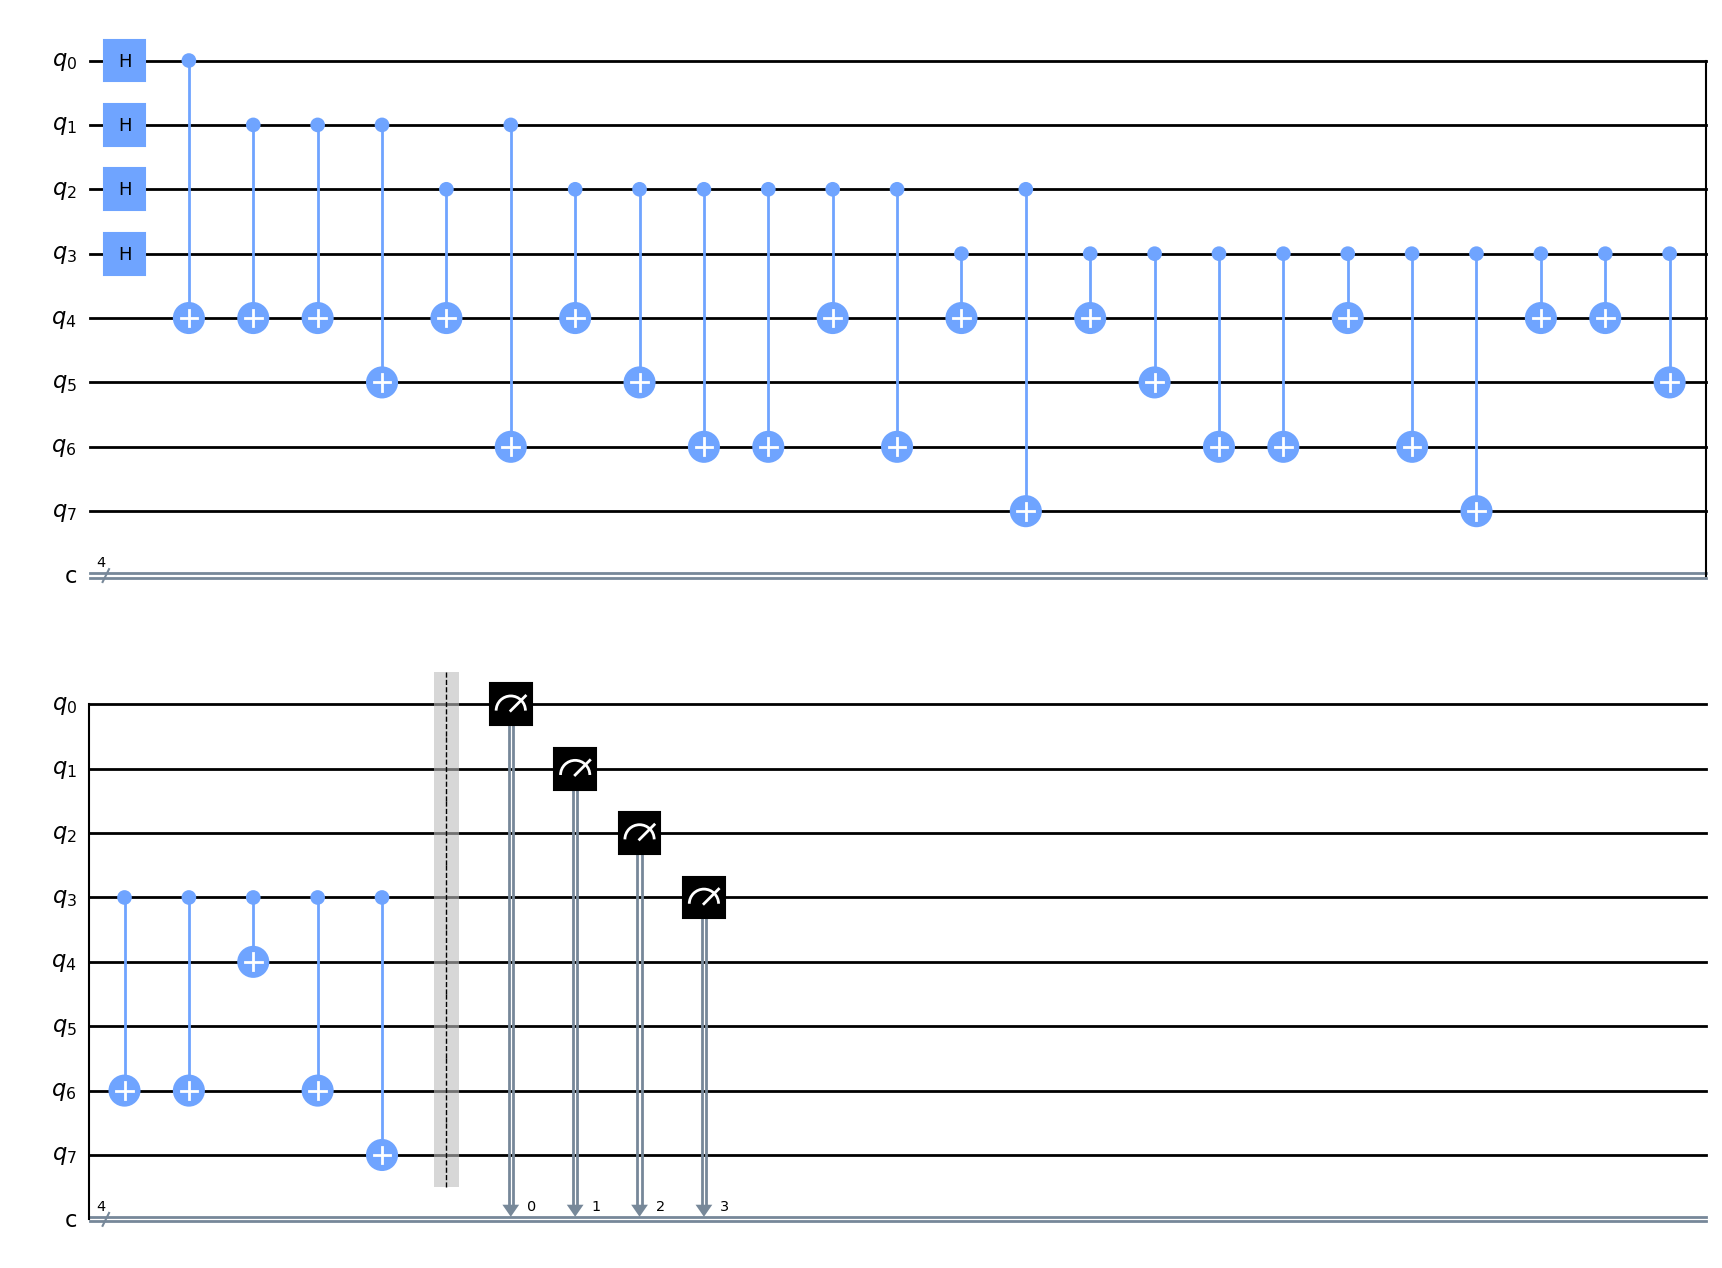

In [12]:
def c_amodN(qc, a, power, N, target_qubits, control_qubit):
    """
    Apply the controlled modular multiplication of `a^power mod N` to the target register
    controlled by the control qubit.
    """
    # We will add X (NOT) gates to simulate modular multiplication
    # In practice, this step would be done using more advanced circuits
    for iteration in range(power):
        for qubit in range(len(target_qubits)):
            if ((a ** iteration) % N) & (1 << qubit):
                qc.cx(control_qubit, target_qubits[qubit])

def modular_exponentiation(qc, a, N, counting_qubits, target_qubits):
    """
    Apply modular exponentiation a^x mod N to the target register controlled by the counting qubits
    """
    n_count = len(counting_qubits)  # Number of counting qubits
    num_target_qubits = len(target_qubits)  # Number of target qubits

    # Iterate over each qubit in the counting register
    for qubit in range(n_count):
        power = 2 ** qubit  # This represents 2^qubit, which corresponds to a^(2^qubit)
        c_amodN(qc, a, power, N, target_qubits, counting_qubits[qubit])

# Example usage with N = 15, a = 7
N = 15  # Number to factor
a = 7   # Chosen integer a such that gcd(a, N) = 1

# Create a quantum circuit with counting + target register
n_count = 4  # Example number of counting qubits
target_qubits = int(np.ceil(np.log2(N)))  # Number of target qubits

qc = QuantumCircuit(n_count + target_qubits, n_count)

# Apply Hadamard gates to the counting qubits
for qubit in range(n_count):
    qc.h(qubit)

# Apply the modular exponentiation
modular_exponentiation(qc, a, N, list(range(n_count)), list(range(n_count, n_count + target_qubits)))

# Add barrier for clarity
qc.barrier()

# Measure only the counting qubits
for qubit in range(n_count):
    qc.measure(qubit, qubit)

# Draw the circuit to visualize
qc.draw('mpl')

In [25]:
import math
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram
from fractions import Fraction

# Function to create the modular exponentiation circuit
def mod_exp_circuit(a, exponent, N):
    """Creates a circuit that implements modular exponentiation of a^exponent mod N"""
    num_qubits = int(math.ceil(math.log(N, 2)))  # Number of qubits to represent N
    mod_exp = QuantumCircuit(num_qubits)
    
    # Multiply a^exponent mod N onto target register
    for _ in range(exponent):
        for qubit in range(num_qubits):
            mod_exp.x(qubit) if ((a >> qubit) & 1) else None
    
    return mod_exp.to_gate(label=f'{a}^{exponent} mod {N}').control()

# Function to apply modular exponentiation (a^x mod N)
def apply_modular_exponentiation(qc, a, N, n_count):
    num_qubits_N = int(math.ceil(math.log(N, 2)))
    for x in range(n_count):
        exponent = 2 ** x
        mod_exp = mod_exp_circuit(a, exponent, N)
        qc.append(mod_exp, [x] + list(range(n_count, n_count + num_qubits_N)))

# Quantum Fourier Transform
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in qc"""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), m, j)
        qc.h(j)

# Finding the factors of N using Shor's algorithm
def shors_algorithm(N):
    # Number of qubits needed to represent N
    n_count = 8

    # Quantum circuit with `n_count` qubits and `n_count` classical bits
    qc = QuantumCircuit(n_count * 2, n_count)

    # Apply Hadamard gates to all counting qubits
    for qubit in range(n_count):
        qc.h(qubit)

    # Choose a random integer a such that 1 < a < N
    a = 7  # Choosing 7 for simplicity here. Change as needed

    # Apply modular exponentiation
    apply_modular_exponentiation(qc, a, N, n_count)

    # Apply inverse QFT
    qft_dagger(qc, n_count)

    # Measure
    for i in range(n_count):
        qc.measure(i, i)

    # Execute the circuit
    backend = Aer.get_backend('qasm_simulator')
    transpiled_qc = transpile(qc, backend)
    job = execute(transpiled_qc, backend, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # Extract the most frequent result
    most_freq_result = max(counts, key=counts.get)
    decimal_value = int(most_freq_result, 2)

    print(f"Measured decimal value: {decimal_value}")

    # Estimate the period r
    fraction = Fraction(decimal_value / (2 ** n_count)).limit_denominator(N)
    r = fraction.denominator

    print(f"Estimated period r: {r}")

    # Check if r is even and find factors
    if r % 2 == 0:
        factor1 = math.gcd(a ** (r // 2) - 1, N)
        factor2 = math.gcd(a ** (r // 2) + 1, N)

        if factor1 != 1 and factor1 != N:
            return factor1, N // factor1
    return None

# Apply Shor's algorithm to factor 15
N = 15
factors = shors_algorithm(N)
if factors:
    print(f"Factors of {N} are {factors[0]} and {factors[1]}")
else:
    print(f"No factors found (likely due to noise/sampling)")

Measured decimal value: 128
Estimated period r: 2
Factors of 15 are 3 and 5
